# CS-6570 Homework 2

*Weber State University*

Rob Christiansen:


For this assignment we're going to play around with some data visualizations. You'll also need to do a bit of data wrangling to get your data into the right format.

For this assignment, we'll download the popular "Baby Names" dataset from the Social Security Administration. You can find a description of this data [here](https://www.ssa.gov/oact/babynames/limits.html), and download the data as a csv file [here](https://www.kaggle.com/datasets/kaggle/us-baby-names), although the easiest place to get the data file is from Canvas.

The first thing we'll want to do is import our favorite libraries - Numpy, Pandas, and Matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now, let's read in the names data as a Pandas dataframe:

In [2]:
# TODO: Import the credits.csv dataset as a dataframe named credits_df, and the titles.csv dataset as a dataframe named titles_df.
df_names = pd.read_csv('Datasets/babynames/NationalNames.csv')
df_names.head(5)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


The dataset contains names by year, gender, and count from 1880 until 2014. It's a pretty big file.

In [3]:
df_names.shape

(1825433, 5)

Let's take a look at how the name "Dylan" has varied over time:

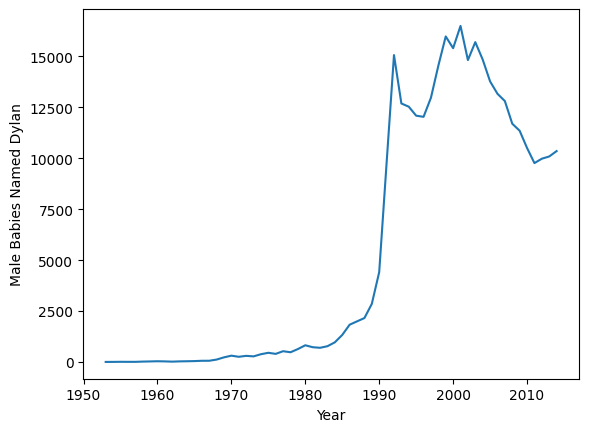

In [4]:
df_dylan = df_names.loc[(df_names['Name'] == 'Dylan') & (df_names['Gender'] == 'M')]

fig, ax = plt.subplots()
ax.plot(df_dylan['Year'], df_dylan['Count'])

ax.set_xlabel('Year')
ax.set_ylabel('Male Babies Named Dylan')
plt.show()

Whoa! It seems like babies named Dylan only started appearing in the United States in the 1950s, and there was a huge increase starting around 1990. My best guess is [this](https://en.wikipedia.org/wiki/Beverly_Hills,_90210) is why.

Let's now take a look at the popularity of the name Patrick.

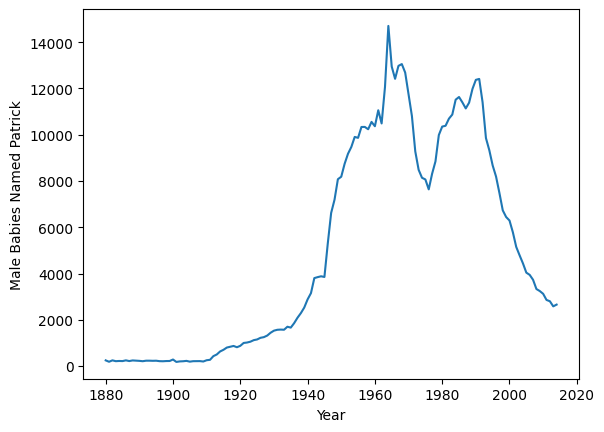

In [5]:
df_patrick = df_names.loc[(df_names['Name'] == 'Patrick') & (df_names['Gender'] == 'M')]

fig, ax = plt.subplots()
ax.plot(df_patrick['Year'], df_patrick['Count'])

ax.set_xlabel('Year')
ax.set_ylabel('Male Babies Named Patrick')
plt.show()

It looks like we've got babies named Patrick as far back as the data goes, and there was a big spike in the 1940s that has come back down considerably since then.

For this assignment, you're going to explore the names data a bit more.

First, add another column in the df_names dataframe that provides the proportion of that name relative to all baby names that year for that gender. So, for example, a proportion of .1 for the name Mary in 1892 would mean that 10% of all female babies were named Mary that year.

In [6]:
# TODO: Add a column 'prop' to the df_names dataframe containing the proportion information described above.
year_aggregation = df_names.pivot_table(index='Year', values=('Count'), aggfunc=sum).sort_index(ascending=True) # Pivot Table to generate the aggregate sums
year_aggregation = year_aggregation.rename(columns={'Count':'Year Total'}) # Rename column
year_aggregation = year_aggregation.reset_index() # Move the index to a column
year_aggregation.info()

df_names_merged = pd.merge(df_names, year_aggregation, on='Year', how="inner")
df_names_merged['prop'] = df_names_merged['Count'].div(df_names_merged['Year Total'])
df_names = df_names_merged.drop(columns='Year Total')
df_names

# titles_df['decade'] = titles_df['release_year'].apply(lambda x: (x // 10) * 10  ) # The idea here is to integer divide by 10 (to round down) and then multiply it by 10
# df_names['prop'] = df_names.apply[]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        135 non-null    int64
 1   Year Total  135 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB


/var/folders/m0/ggccpqsn2kj_43nbhzzcn79m0000gp/T/ipykernel_54195/1274122077.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  year_aggregation = df_names.pivot_table(index='Year', values=('Count'), aggfunc=sum).sort_index(ascending=True) # Pivot Table to generate the aggregate sums


,Id,Name,Year,Gender,Count,prop
0,1,Mary,1880,F,7065,0.035065
1,2,Anna,1880,F,2604,0.012924
2,3,Emma,1880,F,2003,0.009941
3,4,Elizabeth,1880,F,1939,0.009624
4,5,Minnie,1880,F,1746,0.008666
...,...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5,0.000001
1825429,1825430,Zymeer,2014,M,5,0.000001
1825430,1825431,Zymiere,2014,M,5,0.000001
1825431,1825432,Zyran,2014,M,5,0.000001


Next, like the spike we saw with "Dylan" around 1990, there are other names associated with, for example, popular movie or TV characters that we might expect to see increase significantly when those characters become popular. You should create a line plot that contains:

* The proportion over time of four names that you'd expect to increase in popularity significantly around a particular event like a popular Disney movie.
* A legend indicating what these four names are.
* Annotations pointing out these increases and providing a quick description as to why. For example "Aladdin Released" might be the annotation that indicates why the name "Jasmine" became much more popular.

Use different colors for the different names, and label the axes of the figure accordingly.

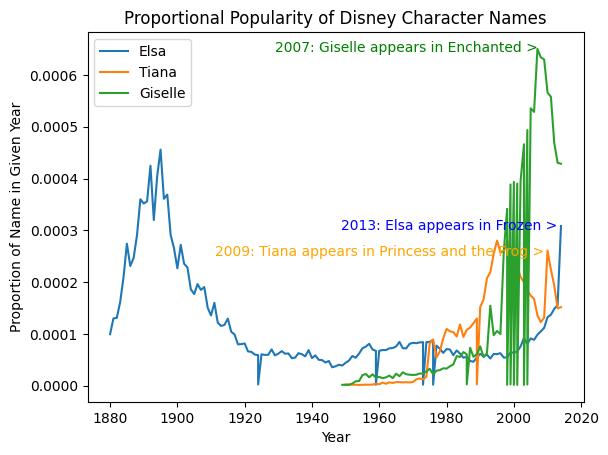

In [7]:
#TODO: Draw the line plots described above.
SearchNames = ['Elsa', 'Tiana','Giselle']
df_stars = df_names.loc[(df_names['Name'].isin(SearchNames))] # Source: https://www.geeksforgeeks.org/how-to-check-if-pandas-column-has-value-from-list-of-string/

fig, ax = plt.subplots()
for item in SearchNames:
    ax.plot(df_stars[['Year']].loc[df_stars['Name']==item], df_stars[['prop']].loc[df_stars['Name']==item], label = item)

ax.legend()
ax.set_title('Proportional Popularity of Disney Character Names')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Name in Given Year')
ax.annotate("2009: Tiana appears in Princess and the Frog >", xy=(2009, .00025), color='orange', horizontalalignment='right')
ax.annotate("2013: Elsa appears in Frozen >", xy=(2013, .0003), color='blue', horizontalalignment='right')
ax.annotate("2007: Giselle appears in Enchanted >", xy=(2007, .000645), color='green', horizontalalignment='right')

plt.show()

Finally, we're going to investigate whether the most popular men's names tend to be more dominant than the most popular women's names, or vice-versa.

To do this, first create a new dataframe that contains the 10 most popular names each decade by proportion. Here proportion means the percentage of babies born that decade of the given gender with that name. The rows of this dataframe should be:
* Indexed by decade (1880, 1890, 1900, etc...)
* Three columns: Name, Gender, Proportion

Using this dataframe, create a scatterplot where each row is a mark and:

* The horizontal axis represents decade.
* The vertical axis represents proportion.
* The marks are colored to indicate gender.

Provide appropriate titles and legends to make this plot clear. Does it look like the most popular male names tend to be more dominant?

/var/folders/m0/ggccpqsn2kj_43nbhzzcn79m0000gp/T/ipykernel_54195/4112080747.py:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df_names_pivot = df_names.pivot_table(index=['Decade','Name','Gender'], values=('Count'), aggfunc=sum).sort_index(ascending=True) # Pivot Table to generate the aggregate sums
/var/folders/m0/ggccpqsn2kj_43nbhzzcn79m0000gp/T/ipykernel_54195/4112080747.py:14: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df_names_decade_pivot = df_names.pivot_table(index=['Decade','Gender'], values=('Count'), aggfunc=sum).sort_index(ascending=True) # Pivot Table to generate the aggregate sums


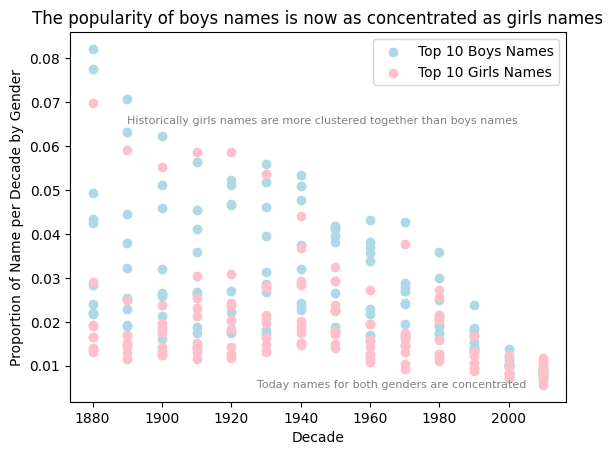

In [65]:
# TODO: Create the figure described above.
# TODO: Add a column 'prop' to the df_names dataframe containing the proportion information described above.

# Step 1: Add a Decade column using integer division
df_names['Decade'] = df_names['Year'].apply(lambda x: (x // 10) * 10  )

# Step 2: Create a new table that sums the counts by Decade, Name, Gender
df_names_pivot = df_names.pivot_table(index=['Decade','Name','Gender'], values=('Count'), aggfunc=sum).sort_index(ascending=True) # Pivot Table to generate the aggregate sums
df_names_pivot = df_names_pivot.rename(columns={'Count':'Decade Total for Name/Gender'}) # Rename column
df_names_pivot = df_names_pivot.reset_index() # Move the index to a column
df_names_pivot

# Step 3: Create a new table that sums the counts by Decade
df_names_decade_pivot = df_names.pivot_table(index=['Decade','Gender'], values=('Count'), aggfunc=sum).sort_index(ascending=True) # Pivot Table to generate the aggregate sums
df_names_decade_pivot = df_names_decade_pivot.rename(columns={'Count':'Decade/Gender Total'}) # Rename column
df_names_decade_pivot = df_names_decade_pivot.reset_index() # Move the index to a column
df_names_decade_pivot

# Step 4: Merge the Decade Pivot into a new table so the 'Decade/Gender Total' is also available per row
df_names_merged_decade = pd.merge(df_names_pivot, df_names_decade_pivot, on=['Decade','Gender'], how="inner")
df_names_merged_decade

# Step 5: Calculate the 'Decade/Gender Proporition' field
df_names_merged_decade['Decade/Gender Proportion'] = df_names_merged_decade['Decade Total for Name/Gender'].div(df_names_merged_decade['Decade/Gender Total'])

# Step 6: Add a rank of the popularity for each gender/decade combination
df_names_merged_decade['Decade/Gender Prop Rank'] = df_names_merged_decade.groupby(['Decade','Gender'])['Decade/Gender Proportion'].rank(ascending=False, method='min')
df_names_merged_decade = df_names_merged_decade.sort_values(by='Decade/Gender Prop Rank', ascending=True )
df_names_merged_decade

# Step 7: Create a new table with the top 10 most popular names for each gender by decade
df_names_most_popular = df_names_merged_decade.loc[df_names_merged_decade['Decade/Gender Prop Rank'] <= 10]

# Step 8: Set the index to 'Decade' and only include the three columns per the instructions
df_names_most_popular = df_names_most_popular.set_index('Decade')
df_names_most_popular = df_names_most_popular[['Name','Gender','Decade/Gender Proportion']]
df_names_most_popular

fig, ax = plt.subplots()

# ax.scatter(df_names_most_popular.index, df_names_most_popular['Decade/Gender Proportion']) # <<< TODO: How to filter to apply two series
ax.scatter(df_names_most_popular.loc[df_names_most_popular['Gender'] =='M'].index, df_names_most_popular['Decade/Gender Proportion'].loc[df_names_most_popular['Gender'] =='M'], color="lightblue", label="Top 10 Boys Names") # <<< TODO: How to filter to apply two series
ax.scatter(df_names_most_popular.loc[df_names_most_popular['Gender'] =='F'].index, df_names_most_popular['Decade/Gender Proportion'].loc[df_names_most_popular['Gender'] =='F'], color="pink", label="Top 10 Girls Names") # <<< TODO: How to filter to apply two series

ax.legend()
ax.set_title('The popularity of boys names is now as concentrated as girls names')
ax.set_xlabel('Decade')
ax.set_ylabel('Proportion of Name per Decade by Gender')
ax.annotate("Historically girls names are more clustered together than boys names", xy=(1890, .065), color='gray', horizontalalignment='left',fontsize=8)
ax.annotate("Today names for both genders are concentrated", xy=(2005, .005), color='gray', horizontalalignment='right',fontsize=8)

plt.show()

When this is done, please upload your completed notebook to Canvas for grading. Thank you!